In [6]:
from FUNCTIONS import *
%matplotlib inline

import sklearn.discriminant_analysis
random.seed(42)

Total Events: 40000
Total Labels: 40000

Shape:  (40000, 1600)

Train:  (27880, 1600) (27880,)
Val:  (6120, 1600) (6120,)
Test:  (6000, 1600) (6000,)
 


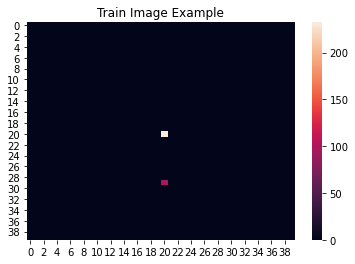

In [7]:
# MAIN
data_s = np.array(pd.read_csv('data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(25000)
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)

In [22]:
random_forest = RandomForestClassifier(random_state=42, n_jobs=-3)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time



# Random Forest
criterion = ['gini']
n_estimators_rf = [800]
max_depth_rf = [100]
min_samples_leaf_rf = [1]
min_samples_split_rf = [10]



# Hyperparameters
random_forest_parameters = {'criterion': criterion, 'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)
clfs_param =[(random_forest, random_forest_parameters)]

In [24]:
# Create list to store models
models = []
unopt_accuracy = []
accuracies = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = -1)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
    print("Optimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
    print("Optimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_accuracy.append(accuracy_score(val_labels, predictions))
    accuracies.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised accuracy (validation): {}'.format(unopt_accuracy))
print('Best unoptimised accuracy (validation): {}\n'.format(max(unopt_accuracy)))
print('All optimised accuracy (validation): {}'.format(accuracies))
print('Best optimised accuracy (validation): {}'.format(max(accuracies)))


RandomForestClassifier

Time to tune: 1224s
Time to fit-predict: 69s

Unoptimised: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -3, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Optimised: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2000, 'n_jobs': -3, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Unoptimised-accuracy-training: 1.0000
Optimised-accuracy-training: 

array([[2182,  796],
       [ 839, 2183]])

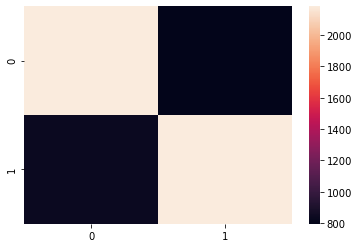

In [21]:
cmxx = sklearn.metrics.confusion_matrix(test_labels, models[0].predict(test_examples))
sns.heatmap(cmxx)
cmxx